<a href="https://colab.research.google.com/github/thinnarat007/python_dataviz2024/blob/main/Indian_Film_Data_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Dataset
Drive link :https://drive.google.com/drive/u/1/folders/1OaXNS_K_IeEaimohWKA8wWDQhfstbJ_0

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Data_viz2024_Data/')

!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/Data_viz2024_Data


In [4]:
# prompt: มีกี่ไฟล์ในโฟล์เดอร์นี้ ไฟล์อะไรบ้าง

import os

files = os.listdir()
print(f"มีไฟล์ทั้งหมด {len(files)} ไฟล์")
print("ไฟล์ที่อยู่ในโฟลเดอร์นี้:")
for file in files:
  print(file)

# !ls

มีไฟล์ทั้งหมด 9 ไฟล์
ไฟล์ที่อยู่ในโฟลเดอร์นี้:
folktales.csv
IMDb Movies India.csv
indian_director.csv
Unknown-4.png
innnn
Test
barchart_data.csv
t
india_merge.csv


# 🔗ข้อมูลที่เราต้องการ

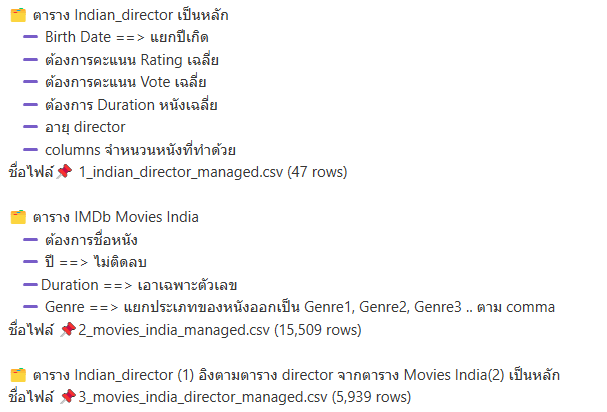

# 🔗Open CSV file 🫣

## IMDb Movies India table

In [5]:
# prompt: open csv file name IMDb Movies India.csv and set csv variable name is  movies_india
import pandas as pd
movies_india = pd.read_csv("IMDb Movies India.csv", encoding='latin-1') # Try reading the file with 'latin-1' encoding.
print(movies_india.shape)
movies_india.head()

(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
# prompt: Using dataframe movies_india:  เช็กค่า missing  ตาราง

# Check for missing values in the dataframe
missing_values = movies_india.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


### Column: "Name"

In [7]:
# prompt: movies_india: แทนที่ แถวแรก ของ column Name ด้วย Unknown
movies_india.loc[0, 'Name'] = 'Unknown'
movies_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Unknown,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# prompt: movies_india: explore column Name

# Explore the 'Name' column in movies_india DataFrame

# Check the number of unique movie names
unique_movie_names = movies_india['Name'].nunique()
print(f"Number of unique movie names: {unique_movie_names}")

# Check the most frequent movie names
most_frequent_movie_names = movies_india['Name'].value_counts().head(10)
print("\nMost frequent movie names:\n", most_frequent_movie_names)

# Check for missing values in the 'Name' column
missing_movie_names = movies_india['Name'].isnull().sum()
print(f"\nNumber of missing movie names: {missing_movie_names}")

Number of unique movie names: 13838

Most frequent movie names:
 Name
Anjaam         7
Mamta          7
Zindagi        6
Musafir        6
Albela         5
Toofan         5
Guru           5
Amar Prem      5
Laila Majnu    5
Shararat       5
Name: count, dtype: int64

Number of missing movie names: 0


### Column: "Year"

In [9]:
# prompt: Using dataframe movies_india: explore column Year

# Look at the unique values in the 'Year' column
print(movies_india['Year'].unique())

# Count the number of movies released in each year
year_counts = movies_india['Year'].value_counts()
print(year_counts)

# Calculate some descriptive statistics for the 'Year' column
print(movies_india['Year'].describe())

[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']
Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(20

In [10]:
# จัดการ column Year จาก '(2004)' ให้เป็นข้อมูล  '2004'

import pandas as pd
movies_india['Year'] = movies_india['Year'].str.extract('(\d{4})')
# movies_india['Year'] = pd.to_numeric(movies_india['Year'], errors='coerce')

# Look at the unique values in the 'Year' column
print(movies_india['Year'].unique())

[nan '2019' '2021' '2010' '1997' '2005' '2008' '2012' '2014' '2004' '2016'
 '1991' '1990' '2018' '1987' '1948' '1958' '2017' '2020' '2009' '2002'
 '1993' '1946' '1994' '2007' '2013' '2003' '1998' '1979' '1951' '1956'
 '1974' '2015' '2006' '1981' '1985' '2011' '2001' '1967' '1988' '1995'
 '1959' '1996' '1970' '1976' '2000' '1999' '1973' '1968' '1943' '1953'
 '1986' '1983' '1989' '1982' '1977' '1957' '1950' '1992' '1969' '1975'
 '1947' '1972' '1971' '1935' '1978' '1960' '1944' '1963' '1940' '1984'
 '1934' '1955' '1936' '1980' '1966' '1949' '1962' '1964' '1952' '1933'
 '1942' '1939' '1954' '1945' '1961' '1965' '1938' '1941' '1931' '1937'
 '2022' '1932' '1923' '1915' '1928' '1922' '1917' '1913' '1930' '1926'
 '1914' '1924']


In [11]:
# prompt: movies_india: เติม missing ของ column Year ด้วย "Unknown"

movies_india['Year'] = movies_india['Year'].fillna('Unknown')
# Look at the unique values in the 'Year' column
print(movies_india['Year'].unique())

['Unknown' '2019' '2021' '2010' '1997' '2005' '2008' '2012' '2014' '2004'
 '2016' '1991' '1990' '2018' '1987' '1948' '1958' '2017' '2020' '2009'
 '2002' '1993' '1946' '1994' '2007' '2013' '2003' '1998' '1979' '1951'
 '1956' '1974' '2015' '2006' '1981' '1985' '2011' '2001' '1967' '1988'
 '1995' '1959' '1996' '1970' '1976' '2000' '1999' '1973' '1968' '1943'
 '1953' '1986' '1983' '1989' '1982' '1977' '1957' '1950' '1992' '1969'
 '1975' '1947' '1972' '1971' '1935' '1978' '1960' '1944' '1963' '1940'
 '1984' '1934' '1955' '1936' '1980' '1966' '1949' '1962' '1964' '1952'
 '1933' '1942' '1939' '1954' '1945' '1961' '1965' '1938' '1941' '1931'
 '1937' '2022' '1932' '1923' '1915' '1928' '1922' '1917' '1913' '1930'
 '1926' '1914' '1924']


### Column: "Duration"

In [12]:
# prompt: movies_india: explore column Duration

import pandas as pd
import matplotlib.pyplot as plt
# Explore the 'Duration' column
print(movies_india['Duration'].unique())

# Check for missing values
print('Check for missing values ', movies_india['Duration'].isnull().sum())

[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 min'
 '107 min' '113 min' '80 min' '122 min' '149 min' '148 min' '130 min'
 '121 min' '188 min' '115 min' '103 min' '114 min' '170 min' '100 min'
 '99 min' '140 min' '128 min' '93 min' '125 min' '145 min' '75 min'
 '111 min' '134 min' '85 min' '104 min' '92 min' '137 min' '127 min'
 '150 min' '119 min' '135 min' '86 min' '76 min' '70 min' '72 min'
 '151 min' '95 min' '52 min' '89 min' '143 min' '177 min' '117 min'
 '123 min' '154 min' '88 min' '175 min' '153 min' '78 min' '139 min'
 '133 min' '101 min' '180 min' '60 min' '46 min' '164 min' '162 min'
 '171 min' '160 min' '152 min' '62 min' '163 min' '165 min' '141 min'
 '210 min' '129 min' '156 min' '240 min' '172 min' '155 min' '118 min'
 '167 min' '106 min' '193 m

In [13]:
# จัดการ column Duration จาก '235 min'  ให้เป็นข้อมูล 235

# Remove ' min' from the 'Duration' column and convert to numeric
movies_india['Duration'] = movies_india['Duration'].str.replace(' min', '').fillna(0).astype(int)

# Display the updated 'Duration' column
print(movies_india['Duration'].head())

0      0
1    109
2     90
3    110
4    105
Name: Duration, dtype: int64


In [14]:
# เติม 0 ของ column Duration ด้วย "Unknown" เพราะเป็นค่า missing

# Replace 0 values in 'Duration' with 'Unknown'
movies_india['Duration'] = movies_india['Duration'].replace(0, 'Unknown')

# Display the updated 'Duration' column
print(movies_india['Duration'].head())

0    Unknown
1        109
2         90
3        110
4        105
Name: Duration, dtype: object


### Column: "Genre"

In [15]:
# prompt: Using dataframe movies_india: explore column Genre

# Look at the unique genres
print(movies_india['Genre'].unique())

# Count the number of movies in each genre
genre_counts = movies_india.groupby('Genre')['Name'].count()
print(genre_counts)

# Find the most frequent genres
print(genre_counts.sort_values(ascending=False).head(10))

['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical'
 'Act

In [16]:
# prompt: movies_india: split value in column genre by ',' and make more column for each of those

# Split the 'Genre' column by ',' and create new columns
movies_india[['Genre1', 'Genre2', 'Genre3']] = movies_india['Genre'].str.split(',', expand=True).fillna('Unknown')

# Display the updated dataframe
movies_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,Unknown,Unknown,Unknown,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Unknown,Unknown
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Unknown,Unknown
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,Unknown
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Unknown
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Unknown,Unknown


In [17]:
# prompt: Using dataframe movies_india: เเทนค่า missing ของคอลัมน์ Rating,	Votes,	Director, Actor 1, Actor 2, Actor 3 ด้วย Unknown

# Replace missing values in specified columns with "Unknown"
columns_to_fill = ['Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in columns_to_fill:
  movies_india[column] = movies_india[column].fillna('Unknown')
movies_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,Unknown,Unknown,Unknown,Drama,Unknown,Unknown,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Unknown,Unknown
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Unknown,Unknown
2,#Homecoming,2021,90,"Drama, Musical",Unknown,Unknown,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,Unknown
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Unknown
4,...And Once Again,2010,105,Drama,Unknown,Unknown,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,Unknown,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Unknown,Unknown
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,Unknown
15506,Zulmi Raj,2005,Unknown,Action,Unknown,Unknown,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,Action,Unknown,Unknown
15507,Zulmi Shikari,1988,Unknown,Action,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Action,Unknown,Unknown


In [18]:
# prompt: Using dataframe movies_india:  เช็กค่า missing  ตาราง

# Check for missing values in the dataframe
missing_values = movies_india.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Name           0
Year           0
Duration       0
Genre       1877
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Genre1         0
Genre2         0
Genre3         0
dtype: int64


In [19]:
movies_india.to_csv('2_movies_india_managed.csv', index=False)

## Indian_director table

In [20]:
# prompt: open csv file name  indian_director.csv and set csv variable name is  indian_director
import pandas as pd
indian_director = pd.read_csv('indian_director.csv')
print(indian_director.shape)
indian_director.head()

(47, 8)


,Position,Const,Created,Modified,Description,Name,Known For,Birth Date
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,10 September 1972
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,24 February 1963
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,15 August 1983
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,9 January 1974
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,14 March 1965


In [21]:
# prompt: Using dataframe indian_director: เช็กค่า missing  ตาราง

# Check for missing values in the dataframe
missing_values = indian_director.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Position        0
Const           0
Created         0
Modified        0
Description    47
Name            0
Known For       0
Birth Date      8
dtype: int64


### Column: "Birth Date"

In [22]:
# prompt: Using dataframe indian_director: Want to separate data in "Birth Date" column into 3 columns according to Day, Month, Year. Replace columns with month names.

# Convert 'Birth Date' to datetime objects, handling potential errors
indian_director['Birth Date'] = pd.to_datetime(indian_director['Birth Date'], errors='coerce')

# Extract day, month, and year from 'Birth Date'
indian_director['Birth_Day'] = indian_director['Birth Date'].dt.day
indian_director['Birth_Month'] = indian_director['Birth Date'].dt.month
indian_director['Birth_Year'] = indian_director['Birth Date'].dt.year

# Replace month numbers with month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
indian_director['Birth_Month'] = indian_director['Birth_Month'].map(month_names)
indian_director.head()

,Position,Const,Created,Modified,Description,Name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10,10.0,September,1972.0
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24,24.0,February,1963.0
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15,15.0,August,1983.0
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09,9.0,January,1974.0
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14,14.0,March,1965.0


In [23]:
# prompt: Using dataframe indian_director: เช็กค่า missing  ของคอลัมน์ Birth Date และ แทนค่าด้วยตัวแปร Unknown

# Check for missing values in 'Birth Date' column
missing_birth_date = indian_director['Birth Date'].isnull().sum()
print(f"Number of missing values in 'Birth Date': {missing_birth_date}")

# Fill missing values with 'Unknown'
indian_director['Birth Date'] = indian_director['Birth Date'].fillna('Unknown')
indian_director['Birth_Day'] = indian_director['Birth_Day'].fillna('Unknown')
indian_director['Birth_Month'] = indian_director['Birth_Month'].fillna('Unknown')
indian_director['Birth_Year'] = indian_director['Birth_Year'].fillna('Unknown')
# Verify the changes
missing_birth_date_after_fill = indian_director['Birth Date'].isnull().sum()
print(f"Number of missing values in 'Birth Date' after filling: {missing_birth_date_after_fill}")

Number of missing values in 'Birth Date': 8
Number of missing values in 'Birth Date' after filling: 0


In [ ]:
# director_Unknown_Name = indian_director[indian_director['Birth Date'] == 'Unknown']

In [24]:
# prompt: indian_director: เปลี่ยนชื่อคอลัมน์ Name เป็นชื่อใหม่คือ Director_name

indian_director = indian_director.rename(columns={'Name': 'Director_name'})
indian_director.head()

,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10 00:00:00,10.0,September,1972.0
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24 00:00:00,24.0,February,1963.0
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15 00:00:00,15.0,August,1983.0
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09 00:00:00,9.0,January,1974.0
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14 00:00:00,14.0,March,1965.0


### Create a column: Director Age

In [25]:
# prompt: Using dataframe indian_director: สร้างคอลัมน์ อายุของ director จากคอลัมน์  Birth Date

# Convert 'Birth Date' to datetime objects
import pandas as pd
indian_director['Birth Date'] = pd.to_datetime(indian_director['Birth Date'], errors='coerce')

# Calculate age based on today's date
today = pd.to_datetime('today')
indian_director['Age'] = (today - indian_director['Birth Date']).dt.days // 365
indian_director['Age'] = indian_director['Age'].fillna('Unknown')
missing_birth_date_after_fill = indian_director['Age'].isnull().sum()
print(f"Number of missing values in 'Age': {missing_birth_date_after_fill}")
indian_director.head()

Number of missing values in 'Age': 0


,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10,10.0,September,1972.0,52.0
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24,24.0,February,1963.0,61.0
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15,15.0,August,1983.0,41.0
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09,9.0,January,1974.0,50.0
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14,14.0,March,1965.0,59.0


In [27]:
indian_director['Age']

,Age
0,52.0
1,61.0
2,41.0
3,50.0
4,59.0
5,57.0
6,51.0
7,52.0
8,61.0
9,53.0


In [28]:
indian_director.to_csv('0_indian_director_managed.csv', index=False)

### Merge table between "movies_india" and "indian_director" **main

In [29]:
# prompt: open csv file name IMDb Movies India.csv and set csv variable name is  movies_india
import pandas as pd
movies_india_managed = pd.read_csv("2_movies_india_managed.csv", encoding='latin-1') # Try reading the file with 'latin-1' encoding.
print(movies_india_managed.shape)
movies_india_managed.head()

(15509, 13)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,Unknown,Unknown,Unknown,Drama,Unknown,Unknown,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Unknown,Unknown
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Unknown,Unknown
2,#Homecoming,2021,90,"Drama, Musical",Unknown,Unknown,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,Unknown
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Unknown
4,...And Once Again,2010,105,Drama,Unknown,Unknown,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Unknown,Unknown


In [30]:
# prompt: Using dataframe movies_india_managed: group by column "Director " sort by mean column 'Rating', 'Duration', 'Votes'

# Check for non-numeric values in the relevant columns and handle them.
for col in ['Rating', 'Duration', 'Votes']:
    # Convert any non-numeric values to NaN
    movies_india_managed[col] = pd.to_numeric(movies_india_managed[col], errors='coerce')

# Group by 'Director' and calculate the mean of 'Rating', 'Duration', and 'Votes'.
df_mean = movies_india_managed.groupby('Director').agg({'Rating': 'mean', 'Duration': 'mean', 'Votes': 'mean'})

df_mean = df_mean.reset_index()

# Display the result.
df_mean

,Director,Rating,Duration,Votes
0,A B Arjun,NaN,NaN,NaN
1,A. Bhimsingh,6.776471,151.214286,82.941176
2,A. Habib,NaN,NaN,NaN
3,A. Jagannathan,5.833333,141.000000,74.333333
4,A. Karim,NaN,NaN,NaN
...,...,...,...,...
5934,Zoya Akhtar,6.800000,146.571429,NaN
5935,Zubair Khan,6.900000,113.000000,68.500000
5936,Zubeida,NaN,NaN,NaN
5937,Zul Vellani,NaN,NaN,NaN


In [31]:
# group by column "Director " sort by count column "Name"
movies_number =  movies_india_managed.groupby(['Director'])[['Name']].count()
movies_number = movies_number.reset_index()
movies_number

,Director,Name
0,A B Arjun,1
1,A. Bhimsingh,18
2,A. Habib,1
3,A. Jagannathan,5
4,A. Karim,1
...,...,...
5934,Zoya Akhtar,7
5935,Zubair Khan,2
5936,Zubeida,2
5937,Zul Vellani,1


In [32]:
indian_director['movies_number'] = indian_director['Director_name'].map(movies_number.set_index('Director')['Name'])
indian_director['Rating_mean'] = indian_director['Director_name'].map(df_mean.set_index('Director')['Rating'])
indian_director['Duration_mean'] = indian_director['Director_name'].map(df_mean.set_index('Director')['Duration'])
indian_director['Votes_mean'] = indian_director['Director_name'].map(df_mean.set_index('Director')['Votes'])
indian_director

,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age,movies_number,Rating_mean,Duration_mean,Votes_mean
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10,10.0,September,1972.0,52.0,15.0,7.385714,146.642857,693.000000
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24,24.0,February,1963.0,61.0,11.0,7.122222,153.777778,NaN
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15,15.0,August,1983.0,41.0,NaN,NaN,NaN,NaN
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09,9.0,January,1974.0,50.0,4.0,7.575000,172.000000,NaN
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14,14.0,March,1965.0,59.0,1.0,8.400000,165.000000,NaN
5,6,nm0223606,2015-06-02,2015-06-02,NaN,Tigmanshu Dhulia,Gangs of Wasseypur,1967-07-03,3.0,July,1967.0,57.0,13.0,6.425000,130.833333,409.600000
6,7,nm0015295,2015-06-02,2015-06-02,NaN,Zoya Akhtar,Zindagi Na Milegi Dobara,1972-10-14,14.0,October,1972.0,51.0,7.0,6.800000,146.571429,NaN
7,8,nm0424103,2015-06-02,2015-06-02,NaN,Karan Johar,Kabhi Khushi Kabhie Gham...,1972-05-25,25.0,May,1972.0,52.0,7.0,6.700000,174.833333,NaN
8,9,nm1018493,2015-06-02,2015-06-02,NaN,Rakeysh Omprakash Mehra,Rang De Basanti,1963-07-07,7.0,July,1963.0,61.0,7.0,6.483333,148.000000,115.000000
9,10,nm0438461,2015-06-02,2015-06-02,NaN,Abhishek Kapoor,Kai po che!,1971-08-06,6.0,August,1971.0,53.0,6.0,6.440000,129.400000,307.000000


In [33]:
# Check for missing values in the dataframe
missing_values = indian_director.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Position          0
Const             0
Created           0
Modified          0
Description      47
Director_name     0
Known For         0
Birth Date        8
Birth_Day         0
Birth_Month       0
Birth_Year        0
Age               0
movies_number     1
Rating_mean       1
Duration_mean     1
Votes_mean       29
dtype: int64


In [34]:
indian_director['Votes_mean'] = indian_director['Votes_mean'].fillna('Unknown')
indian_director['Rating_mean'] = indian_director['Rating_mean'].fillna('Unknown')
indian_director['Duration_mean'] = indian_director['Duration_mean'].fillna('Unknown')
indian_director['movies_number'] = indian_director['movies_number'].fillna('Unknown')

In [35]:
# Check for missing values in the dataframe
missing_values = indian_director.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Position          0
Const             0
Created           0
Modified          0
Description      47
Director_name     0
Known For         0
Birth Date        8
Birth_Day         0
Birth_Month       0
Birth_Year        0
Age               0
movies_number     0
Rating_mean       0
Duration_mean     0
Votes_mean        0
dtype: int64


In [36]:
indian_director.head()

,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age,movies_number,Rating_mean,Duration_mean,Votes_mean
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10,10.0,September,1972.0,52.0,15.0,7.385714,146.642857,693.0
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24,24.0,February,1963.0,61.0,11.0,7.122222,153.777778,Unknown
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15,15.0,August,1983.0,41.0,Unknown,Unknown,Unknown,Unknown
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09,9.0,January,1974.0,50.0,4.0,7.575,172.0,Unknown
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14,14.0,March,1965.0,59.0,1.0,8.4,165.0,Unknown


In [37]:
indian_director.to_csv('1_indian_director_managed.csv', index=False)

### Merge table between "movies_india"**main and "indian_director"

In [38]:
# prompt: open csv file name IMDb Movies India.csv and set csv variable name is  movies_india
import pandas as pd
indian_director_managed = pd.read_csv("0_indian_director_managed.csv", encoding='latin-1') # Try reading the file with 'latin-1' encoding.
print(indian_director_managed.shape)
indian_director_managed.head()

(47, 12)


,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age
0,1,nm0440604,2015-06-02,2015-06-02,NaN,Anurag Kashyap,Gangs of Wasseypur,1972-09-10,10.0,September,1972.0,52.0
1,2,nm0080220,2015-06-02,2015-06-02,NaN,Sanjay Leela Bhansali,Bajirao Mastani,1963-02-24,24.0,February,1963.0,61.0
2,3,nm2209781,2015-06-02,2015-06-02,NaN,Ayan Mukerji,Brahmastra Part One: Shiva,1983-08-15,15.0,August,1983.0,41.0
3,4,nm1027719,2015-06-02,2015-06-02,NaN,Farhan Akhtar,Zindagi Na Milegi Dobara,1974-01-09,9.0,January,1974.0,50.0
4,5,nm0451148,2015-06-02,2015-06-02,NaN,Aamir Khan,Taare Zameen Par,1965-03-14,14.0,March,1965.0,59.0


In [39]:
movies_number.head()

,Director,Name
0,A B Arjun,1
1,A. Bhimsingh,18
2,A. Habib,1
3,A. Jagannathan,5
4,A. Karim,1


In [40]:
df_mean.head()

,Director,Rating,Duration,Votes
0,A B Arjun,NaN,NaN,NaN
1,A. Bhimsingh,6.776471,151.214286,82.941176
2,A. Habib,NaN,NaN,NaN
3,A. Jagannathan,5.833333,141.000000,74.333333
4,A. Karim,NaN,NaN,NaN


In [41]:
df_mean = df_mean.rename(columns={'Rating': 'Rating_mean','Duration': 'Duration_mean', 'Votes': 'Votes_mean'})
df_mean['movies_number'] = df_mean['Director'].map(movies_number.set_index('Director')['Name'])
df_mean

,Director,Rating_mean,Duration_mean,Votes_mean,movies_number
0,A B Arjun,NaN,NaN,NaN,1
1,A. Bhimsingh,6.776471,151.214286,82.941176,18
2,A. Habib,NaN,NaN,NaN,1
3,A. Jagannathan,5.833333,141.000000,74.333333,5
4,A. Karim,NaN,NaN,NaN,1
...,...,...,...,...,...
5934,Zoya Akhtar,6.800000,146.571429,NaN,7
5935,Zubair Khan,6.900000,113.000000,68.500000,2
5936,Zubeida,NaN,NaN,NaN,2
5937,Zul Vellani,NaN,NaN,NaN,1


In [42]:
merged_df = df_mean.merge(indian_director_managed, left_on='Director', right_on='Director_name', how='left')
merged_df

,Director,Rating_mean,Duration_mean,Votes_mean,movies_number,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age
0,A B Arjun,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A. Bhimsingh,6.776471,151.214286,82.941176,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A. Habib,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A. Jagannathan,5.833333,141.000000,74.333333,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A. Karim,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,Zoya Akhtar,6.800000,146.571429,NaN,7,7.0,nm0015295,2015-06-02,2015-06-02,NaN,Zoya Akhtar,Zindagi Na Milegi Dobara,1972-10-14,14.0,October,1972.0,51.0
5935,Zubair Khan,6.900000,113.000000,68.500000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5936,Zubeida,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5937,Zul Vellani,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# prompt: Using dataframe merged_df: เติมค่า missing ด้วย Unknown

# Fill missing values in all columns with 'Unknown'
merged_df = merged_df.fillna('Unknown')
merged_df

,Director,Rating_mean,Duration_mean,Votes_mean,movies_number,Position,Const,Created,Modified,Description,Director_name,Known For,Birth Date,Birth_Day,Birth_Month,Birth_Year,Age
0,A B Arjun,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,A. Bhimsingh,6.776471,151.214286,82.941176,18,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,A. Habib,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,A. Jagannathan,5.833333,141.0,74.333333,5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,A. Karim,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,Zoya Akhtar,6.8,146.571429,Unknown,7,7.0,nm0015295,2015-06-02,2015-06-02,Unknown,Zoya Akhtar,Zindagi Na Milegi Dobara,1972-10-14,14.0,October,1972.0,51.0
5935,Zubair Khan,6.9,113.0,68.5,2,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5936,Zubeida,Unknown,Unknown,Unknown,2,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5937,Zul Vellani,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [44]:
merged_df.to_csv('3_movies_india_director_managed.csv', index=False)